<a href="https://colab.research.google.com/github/balladembelemoussa/codesandbox-template-nuxt/blob/main/cpd4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K-signifie
K-means est une méthode d'apprentissage non supervisée pour regrouper des points de données. L'algorithme divise de manière itérative les points de données en K clusters en minimisant la variance dans chaque cluster.

Ici, nous allons vous montrer comment estimer la meilleure valeur pour K en utilisant la méthode du coude, puis utiliser le clustering K-means pour regrouper les points de données en clusters.

Comment ça marche?
Tout d'abord, chaque point de données est attribué au hasard à l'un des K clusters. Ensuite, nous calculons le centroïde (fonctionnellement le centre) de chaque cluster et réaffectons chaque point de données au cluster avec le centroïde le plus proche. Nous répétons ce processus jusqu'à ce que les affectations de cluster pour chaque point de données ne changent plus.

Le clustering K-means nous oblige à sélectionner K, le nombre de clusters dans lesquels nous voulons regrouper les données. La méthode du coude nous permet de représenter graphiquement l'inertie (une métrique basée sur la distance) et de visualiser le point auquel elle commence à diminuer de manière linéaire. Ce point est appelé « eblow » et est une bonne estimation de la meilleure valeur pour K sur la base de nos données.

Exemple
Commencez par visualiser quelques points de données :

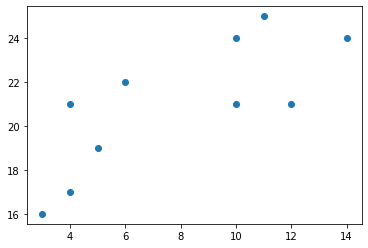

In [2]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 6, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]

plt.scatter(x, y)
plt.show()

# Resultas

**Apprentissage automatique - Agrégation bootstrap (Bagging)**

Ensachage
Des méthodes telles que les arbres de décision peuvent être sujettes à un surajustement de l'ensemble d'apprentissage, ce qui peut entraîner de mauvaises prédictions sur de nouvelles données.

L'agrégation bootstrap (ensachage) est une méthode d'assemblage qui tente de résoudre le surajustement pour les problèmes de classification ou de régression. Le bagging vise à améliorer la précision et les performances des algorithmes d'apprentissage automatique. Pour ce faire, il prend des sous-ensembles aléatoires d'un ensemble de données d'origine, avec remplacement, et adapte soit un classificateur (pour la classification) soit un régresseur (pour la régression) à chaque sous-ensemble. Les prédictions pour chaque sous-ensemble sont ensuite agrégées par vote majoritaire pour la classification ou la moyenne pour la régression, ce qui augmente la précision des prédictions.

Évaluation d'un classificateur de base
Pour voir comment le bagging peut améliorer les performances du modèle, nous devons commencer par évaluer les performances du classificateur de base sur l'ensemble de données. Si vous ne savez pas ce que sont les arbres de décision, revoyez la leçon sur les arbres de décision avant d'aller plus loin, car l'ensachage est une continuation du concept.

Nous chercherons à identifier différentes classes de vins trouvées dans l'ensemble de données sur les vins de Sklearn.

Commençons par importer les modules nécessaires.

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

Ensuite, nous devons charger les données et les stocker dans X (entités d'entrée) et y (cible). Le paramètre as_frame est égal à True afin de ne pas perdre les noms des fonctionnalités lors du chargement des données. ( sklearnla version antérieure à 0.23 doit ignorer l' as_frameargument car il n'est pas pris en charge)

In [4]:
data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

Afin d'évaluer correctement notre modèle sur des données invisibles, nous devons diviser X et y en ensembles d'apprentissage et de test. Pour plus d'informations sur le fractionnement des données, consultez la leçon Apprentissage/Test.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

Une fois nos données préparées, nous pouvons maintenant instancier un classificateur de base et l'adapter aux données d'apprentissage.

In [8]:
y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8222222222222222


Exemple
Importez les données nécessaires et évaluez les performances du classificateur de base.texte en gras

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

dtree = DecisionTreeClassifier(random_state = 22)
dtree.fit(X_train,y_train)

y_pred = dtree.predict(X_test)

print("Train data accuracy:",accuracy_score(y_true = y_train, y_pred = dtree.predict(X_train)))
print("Test data accuracy:",accuracy_score(y_true = y_test, y_pred = y_pred))

Train data accuracy: 1.0
Test data accuracy: 0.8222222222222222


Le classificateur de base fonctionne raisonnablement bien sur l'ensemble de données, atteignant une précision de 82 % sur l'ensemble de données de test avec les paramètres actuels (des résultats différents peuvent se produire si vous ne disposez pas du random_statejeu de paramètres).

Maintenant que nous avons une précision de base pour l'ensemble de données de test, nous pouvons voir comment le classificateur d'ensachage effectue un seul classificateur d'arbre de décision

Création d'un classificateur d'ensachage
Pour le bagging, nous devons définir le paramètre n_estimators, c'est le nombre de classificateurs de base que notre modèle va agréger ensemble.

Pour cet échantillon de données, le nombre d'estimateurs est relativement faible, il arrive souvent que des plages beaucoup plus larges soient explorées. Le réglage des hyperparamètres est généralement effectué avec une recherche de grille , mais pour l'instant, nous utiliserons un ensemble sélectionné de valeurs pour le nombre d'estimateurs.

Nous commençons par importer le modèle nécessaire.

In [10]:
from sklearn.ensemble import BaggingClassifier

Créons maintenant une plage de valeurs qui représentent le nombre d'estimateurs que nous voulons utiliser dans chaque ensemble

In [11]:
estimator_range = [2,4,6,8,10,12,14,16]

Pour voir comment le classificateur d'ensachage fonctionne avec différentes valeurs de n_estimators, nous avons besoin d'un moyen d'itérer sur la plage de valeurs et de stocker les résultats de chaque ensemble. Pour ce faire, nous allons créer une boucle for, stockant les modèles et les scores dans des listes séparées pour des visualisations ultérieures.

Remarque : Le paramètre par défaut pour le classificateur de base dans BaggingClassifierest DicisionTreeClassifierdonc nous n'avons pas besoin de le définir lors de l'instanciation du modèle d'ensachage.

In [12]:
models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

Avec les modèles et les scores stockés, nous pouvons maintenant visualiser l'amélioration des performances du modèle.

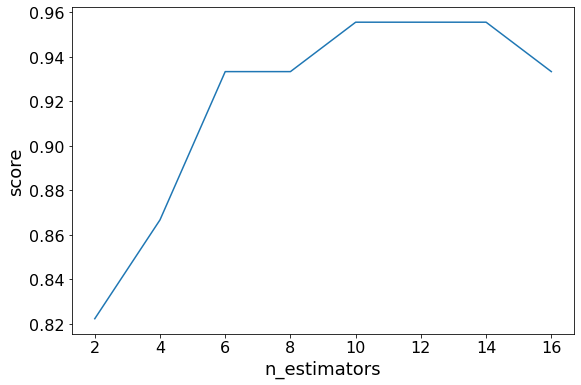

In [13]:
import matplotlib.pyplot as plt

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

Exemple
Importez les données nécessaires et évaluez les BaggingClassifierperformances.

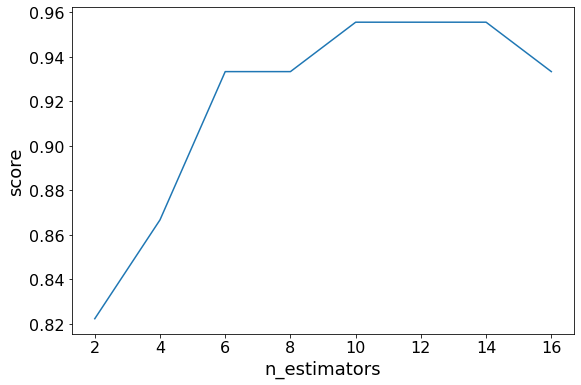

In [14]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

estimator_range = [2,4,6,8,10,12,14,16]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 22)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

Résultats expliqués
En parcourant différentes valeurs pour le nombre d'estimateurs, nous pouvons voir une augmentation des performances du modèle de 82,2 % à 95,5 %. Après 14 estimateurs, la précision commence à baisser, encore une fois si vous définissez un autre random_state, les valeurs que vous voyez varieront. C'est pourquoi il est recommandé d'utiliser la validation croisée pour garantir des résultats stables.

Dans ce cas, nous constatons une augmentation de 13,3% de la précision lorsqu'il s'agit d'identifier le type de vin.

Une autre forme d'évaluation
Comme le bootstrap choisit des sous-ensembles aléatoires d'observations pour créer des classificateurs, certaines observations sont laissées de côté dans le processus de sélection. Ces observations "out-of-bag" peuvent ensuite être utilisées pour évaluer le modèle, de manière similaire à celle d'un ensemble de test. Gardez à l'esprit que l'estimation out-of-bag peut surestimer l'erreur dans les problèmes de classification binaire et ne doit être utilisée qu'en complément d'autres métriques.

Nous avons vu dans le dernier exercice que 12 estimateurs donnaient la plus grande précision, nous allons donc l'utiliser pour créer notre modèle. Cette fois, définissez le paramètre oob_scoresur true pour évaluer le modèle avec un score hors sac.

Exemple
Créez un modèle avec une métrique hors sac

In [15]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

data = datasets.load_wine(as_frame = True)

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

oob_model = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

oob_model.fit(X_train, y_train)

print(oob_model.oob_score_)

0.9398496240601504


Étant donné que les échantillons utilisés dans OOB et l'ensemble de test sont différents et que l'ensemble de données est relativement petit, il existe une différence dans la précision. Il est rare qu'ils soient exactement les mêmes, encore une fois OOB devrait être utilisé comme moyen rapide pour estimer l'erreur, mais ce n'est pas la seule métrique d'évaluation.

Génération d'arbres de décision à partir du classificateur d'ensachage
Comme nous l'avons vu dans la leçon sur l' arbre de décision , il est possible de représenter graphiquement l'arbre de décision créé par le modèle. Il est également possible de voir les arbres de décision individuels qui sont entrés dans le classificateur agrégé. Cela nous aide à acquérir une compréhension plus intuitive de la façon dont le modèle d'ensachage arrive à ses prédictions.

Remarque : Ceci n'est fonctionnel qu'avec des ensembles de données plus petits, où les arbres sont relativement peu profonds et étroits, ce qui les rend faciles à visualiser.

Nous devrons importer la plot_treefonction de sklearn.tree. Les différents arbres peuvent être représentés graphiquement en changeant l'estimateur que vous souhaitez visualiser.

Exemple
Générer des arbres de décision à partir du classificateur d'ensachage

[Text(0.4583333333333333, 0.875, 'proline <= 727.5\ngini = 0.611\nsamples = 82\nvalue = [54, 60, 19]'),
 Text(0.25, 0.625, 'flavanoids <= 1.335\ngini = 0.339\nsamples = 47\nvalue = [0, 58, 16]'),
 Text(0.16666666666666666, 0.375, 'hue <= 0.92\ngini = 0.266\nsamples = 15\nvalue = [0, 3, 16]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 13\nvalue = [0, 0, 16]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 3, 0]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 32\nvalue = [0, 55, 0]'),
 Text(0.6666666666666666, 0.625, 'flavanoids <= 1.605\ngini = 0.159\nsamples = 35\nvalue = [54, 2, 3]'),
 Text(0.5, 0.375, 'color_intensity <= 4.325\ngini = 0.375\nsamples = 3\nvalue = [0, 1, 3]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 3]'),
 Text(0.8333333333333334, 0.375, 'magnesium <= 147.0\ngini = 0.036\nsamples = 32\nvalue = [54, 1, 0]'),
 Text(0.75, 0

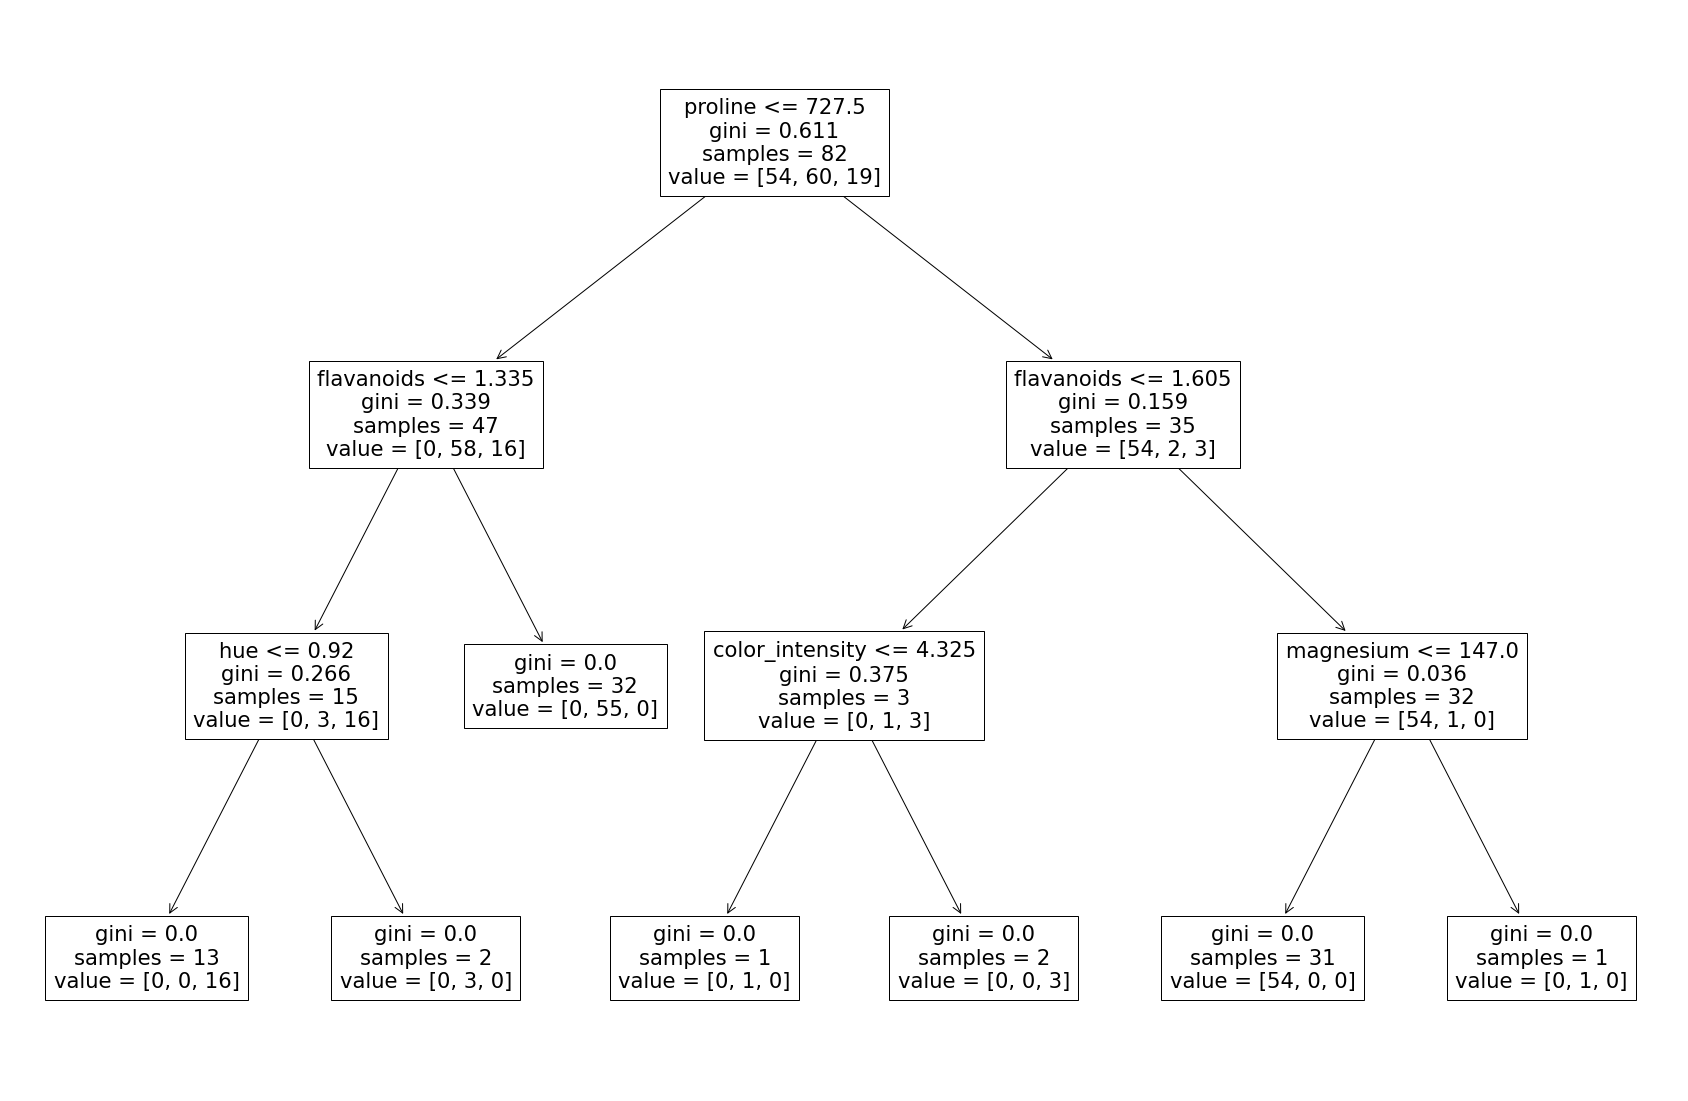

In [16]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import plot_tree

X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 22)

clf = BaggingClassifier(n_estimators = 12, oob_score = True,random_state = 22)

clf.fit(X_train, y_train)

plt.figure(figsize=(30, 20))

plot_tree(clf.estimators_[0], feature_names = X.columns)

Ici, nous ne pouvons voir que le premier arbre de décision qui a été utilisé pour voter sur la prédiction finale. Encore une fois, en changeant l'index du classificateur, vous pouvez voir chacun des arbres qui ont été agrégés.